In [469]:
# Import the needed libraries
import pandas as pd
import numpy as np

# Part 1

## Read the data

In [470]:
# Used this function in another class
df = pd.read_csv("raw_data_ds.csv")
df

,Height,Weight,Age,Grip strength,Frailty
0,65.8,112,30,30,N
1,71.5,136,19,31,N
2,69.4,153,45,29,N
3,68.2,142,22,28,Y
4,67.8,144,29,24,Y
5,68.7,123,50,26,N
6,69.8,141,51,22,Y
7,70.1,136,23,20,Y
8,67.9,112,17,19,N
9,66.8,120,39,31,N


## Unit Standardization




In [471]:
# Here, I replace the features as adding new features adds too much visual clutter
df["Height"] = df["Height"] * 0.0254
df["Weight"] = df["Weight"] * 0.45359237
df

,Height,Weight,Age,Grip strength,Frailty
0,1.67132,50.802345,30,30,N
1,1.81610,61.688562,19,31,N
2,1.76276,69.399633,45,29,N
3,1.73228,64.410117,22,28,Y
4,1.72212,65.317301,29,24,Y
5,1.74498,55.791862,50,26,N
6,1.77292,63.956524,51,22,Y
7,1.78054,61.688562,23,20,Y
8,1.72466,50.802345,17,19,N
9,1.69672,54.431084,39,31,N


## Feature Engineering

In [472]:
df["BMI"] = df["Weight"] / (df["Height"] ** 2)

# Create AgeGroup categorical feature
# Used the Pandas documentation from the following: https://pandas.pydata.org/docs/user_guide/categorical.html
age_group_labels = ["<30", "30-45", "46-60", ">60"]
df["AgeGroup"] = pd.cut(df["Age"], bins=[0, 30, 46, 60, float("inf")], right=False, labels=age_group_labels)

## Categorical -> Numeric Encoding

In [473]:
# Used the docs from the following: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.map.html
df["Frailty_binary"] = df["Frailty"].map(lambda x: 1 if x == "Y" else 0).astype("int8")

# Used the docs from the following: https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html
df = pd.get_dummies(df, prefix="AgeGroup", columns=["AgeGroup"], dtype="int8")

## EDA & Reporting

In [474]:
df.to_csv("data_clean.ds.csv", index=False)

# Used the docs from the following: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.agg.html
summary = df.select_dtypes(include="number").agg(["mean", "median", "std"])

print(summary)

# Used the docs from the following: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html
correlation = df["Grip strength"].corr(df["Frailty_binary"])

print(correlation)


          Height     Weight        Age  Grip strength        BMI  \
mean    1.742440  59.828834  32.500000      26.000000  19.682847   
median  1.738630  61.688562  29.500000      27.000000  19.182654   
std     0.042435   6.455441  12.860361       4.521553   1.782711   

        Frailty_binary  AgeGroup_<30  AgeGroup_30-45  AgeGroup_46-60  \
mean          0.400000      0.500000        0.300000        0.200000   
median        0.000000      0.500000        0.000000        0.000000   
std           0.516398      0.527046        0.483046        0.421637   

        AgeGroup_>60  
mean             0.0  
median           0.0  
std              0.0  
-0.4758668672668007


# Part 2

## Read the data

In [475]:
df = pd.read_csv("StudentsPerformance.csv")
# Sanity check
df.head(15)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


## Get Correct Dimensions

In [476]:
# pd boxplot figsize is in inches, so need to convert dpi and pixels to inches
# DPI = Pixels / inches -> inches = Pixels / DPI
dpi = 300
width = 800
height = 600
fig_size = (width / dpi, height / dpi)


## V1: Gender boxplots - Math vs Reading

Text(0.5, 0.98, '')

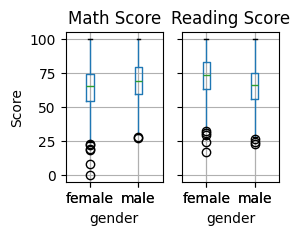

In [477]:
# Used the following documentation: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.boxplot.html
box_plot_1, box_plot_2 = df.boxplot(
    column=["math score", "reading score"],
    by="gender",
    figsize=fig_size,
    return_type="axes"
)

box_plot_1.set_title("Math Score")
box_plot_2.set_title("Reading Score")

box_plot_1.set_ylabel("Score")

box_plot_1.get_figure().suptitle("")




### Analysis

There exists a small difference between male and female scores. The differnce favors males in math scores, and it favors femals in reading scores. There exists outliers for female and male students, however, there seems to be a wider distribution of female outliers. It should be noted that the median for each of the genders is particularly close in math, with a somewhat larger difference in reading.

## V2: Test Prep Impact on Math

Text(0.5, 0, 'Test Preparation Status')

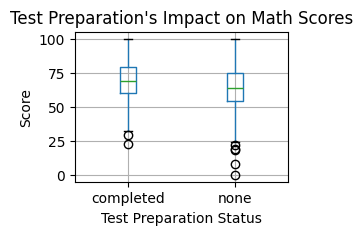

In [478]:
box_plot = df.boxplot(
    column=["math score"],
    by="test preparation course",
    figsize=fig_size,
)

box_plot.get_figure().suptitle("")
box_plot.set_title("Test Preparation's Impact on Math Scores")
box_plot.set_ylabel("Score")
box_plot.set_xlabel("Test Preparation Status")

### Analysis

There is an impact on the status of the test preparation on the math scores. Students that completed the test preparation achieved a higher median score than the ones that did not. In addition, there were most student outliers in the no test preparation category near the bottom. This indicates that, for some students, they struggled without the test preparation. We do not see this quite as strongly in the completed section. This could also indicate that completing test preparation gives a higher base-line for students.

## V3: Lunch Type and Average Performance

<Axes: title={'center': 'Overall Average Score by Lunch Type'}, xlabel='Lunch Type', ylabel='Score'>

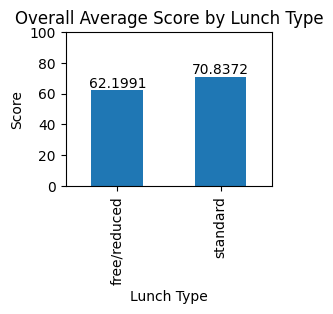

In [479]:
# Documentation from the following: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html
# and https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html
df["overall_avg"] = df[["math score", "reading score", "writing score"]].mean(axis=1)
df_grouped = df.groupby("lunch")["overall_avg"].mean()

bar_chart = df_grouped.plot.bar(
    x="Lunch Type",
    y="Overall Average Score",
    figsize=fig_size
)

# I got this code from https://stackoverflow.com/questions/70235487/adding-value-labels-to-bar-graph
bar_chart.bar_label(bar_chart.containers[0], label_type='edge')

bar_chart.set_title("Overall Average Score by Lunch Type")
bar_chart.set_ylabel("Score")
bar_chart.set_ybound(0, 100)
bar_chart.set_xlabel("Lunch Type")

bar_chart

### Analysis
The lunch type by students relates to the outcome of test scores. Standard lunch students achieve a higher score when compared to students on free/reduced lunch. The difference between the students is almost 10 points. It is unlikely that the lunch itself is providing this difference. Rather, it is more likely that this indicates the socioeconomic status of the students. It should be noted that the average score for standard students is quite low. We would expect the score to be closer to 75.

## V4: Subject Correlations


Text(50.72222222222221, 0.5, 'Subject Type')

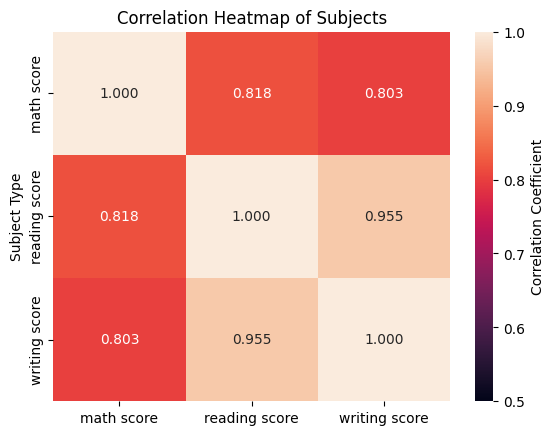

In [480]:
# I could not find a heatmap in pandas documentation. I am using seaborns
# library as I learned that in another class (Intro to Machine Learning)
# Documentation from the following: https://seaborn.pydata.org/generated/seaborn.heatmap.html
import seaborn as sns

correlation = df[["math score", "reading score", "writing score"]].corr()
heat_map = sns.heatmap(
    correlation,
    fmt=".3f",
    annot=True,
    vmin=0.5,
    vmax=1,
    cbar_kws={'label': 'Correlation Coefficient'} # I found this from the following: https://stackoverflow.com/questions/42092218/how-to-add-a-label-to-seaborn-heatmap-color-bar
)

heat_map.set_title("Correlation Heatmap of Subjects")
heat_map.set_ylabel("Subject Type")


### Analysis
The three subjects track near to one another. Reading and writing are closer than Math. This is to be expected as reading and writing are related subjects. The greatest difference was between math and writing, followed by math and reading. However, it should be noted that the difference was still only around 0.2, and it was still closely related.

## V5: Math vs Reading with Trend Lines by Test Prep

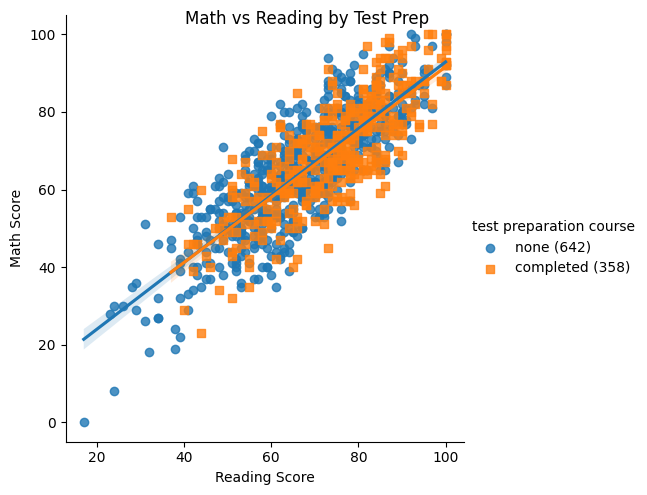

In [481]:
# I used the documentation from the following:
# https://seaborn.pydata.org/generated/seaborn.lmplot.html
scatter_plot_df = df[["math score", "reading score", "test preparation course"]]

num_none = (df["test preparation course"] == "none").sum()
num_complete = (df["test preparation course"] == "completed").sum()

scatter_plot = sns.lmplot(
    x="reading score",
    y="math score",
    data=scatter_plot_df,
    hue="test preparation course",
    markers=["o", "s"]
)

scatter_plot.figure.suptitle("Math vs Reading by Test Prep")
scatter_plot.set_ylabels("Math Score")
scatter_plot.set_xlabels("Reading Score")
scatter_plot._legend.texts[0].set_text(f"none ({num_none})")
scatter_plot._legend.texts[1].set_text(f"completed ({num_complete})")



### Analysis
The math and reading scores are strongly associated together. As the math scores increase, so too do the reading scores. Their relationship almost has a slope of 1. Students that have done test preparation do not have a different slope then the ones that do not. This indicates that the test preparation helps the student's math and reading skills equally.